<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practice Bayesian Modelling on Auto Data


---

In this lab you will get some practice building models with `pymc3`. Please reference the preceding lesson on estimation and regression with `pymc3` for tips on how to code these models up.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.simplefilter('ignore')

### 1. Load the auto data. Perform any cleaning or EDA necessary.

In [2]:
auto = pd.read_csv('../../../../../resource-datasets/auto_stats/Auto.csv')

In [3]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [4]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [52]:
auto.info

<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0    3504          12.0    70   
1    15.0          8         350.0       165.0    3693          11.5    70   
2    18.0          8         318.0       150.0    3436          11.0    70   
3    16.0          8         304.0       150.0    3433          12.0    70   
4    17.0          8         302.0       140.0    3449          10.5    70   
5    15.0          8         429.0       198.0    4341          10.0    70   
6    14.0          8         454.0       220.0    4354           9.0    70   
7    14.0          8         440.0       215.0    4312           8.5    70   
8    14.0          8         455.0       225.0    4425          10.0    70   
9    15.0          8         390.0       190.0    3850           8.5    70   
10   15.0          8         383.0       170.0    3563          10.0    70   
11   14.0          8         340

In [6]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
print(auto.horsepower.unique())
auto.horsepower = auto.horsepower.map(
    lambda x: np.nan if x == '?' else float(x))
auto.isnull().sum()

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [8]:
auto.dropna(inplace=True)

### 2. Create columns indicating if the car brand is from the USA, Asia, or Europe.

Take into account that some brand names are not given correctly.

In [9]:
auto['maker'] = auto.name.map(lambda x: x.split()[0])
auto['maker'].value_counts()

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
peugeot           8
fiat              8
audi              7
vw                6
volvo             6
chrysler          6
saab              4
opel              4
subaru            4
renault           3
chevy             3
bmw               2
maxda             2
mercedes-benz     2
cadillac          2
vokswagen         1
chevroelt         1
nissan            1
triumph           1
mercedes          1
capri             1
hi                1
toyouta           1
Name: maker, dtype: int64

In [10]:
replacements = {'chevroelt': 'chevrolet', 'chevy': 'chevrolet', 'vokswagen': 'volkswagen',
                'toyouta': 'toyota', 'maxda': 'mazda', 'mercedes-benz': 'mercedes', 'vw': 'volkswagen'}
auto['maker'] = auto.maker.replace(replacements)

In [11]:
auto = auto[(auto['maker'] != 'hi')]
auto['maker'].value_counts()

ford          48
chevrolet     47
plymouth      31
dodge         28
amc           27
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
fiat           8
peugeot        8
audi           7
chrysler       6
volvo          6
opel           4
subaru         4
saab           4
mercedes       3
renault        3
bmw            2
cadillac       2
nissan         1
triumph        1
capri          1
Name: maker, dtype: int64

In [12]:
american = ['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac', 'dodge', 'mercury',
            'oldsmobile', 'chrysler', 'cadillac', 'capri']
euro = ['volkswagen', 'peugeot', 'audi', 'saab', 'bmw',
        'opel', 'fiat', 'volvo', 'renault', 'mercedes', 'triumph']
asian = ['toyota', 'datsun', 'mazda', 'honda', 'subaru', 'nissan']

In [13]:
auto.origin.value_counts(normalize=True)

1    0.624041
3    0.202046
2    0.173913
Name: origin, dtype: float64

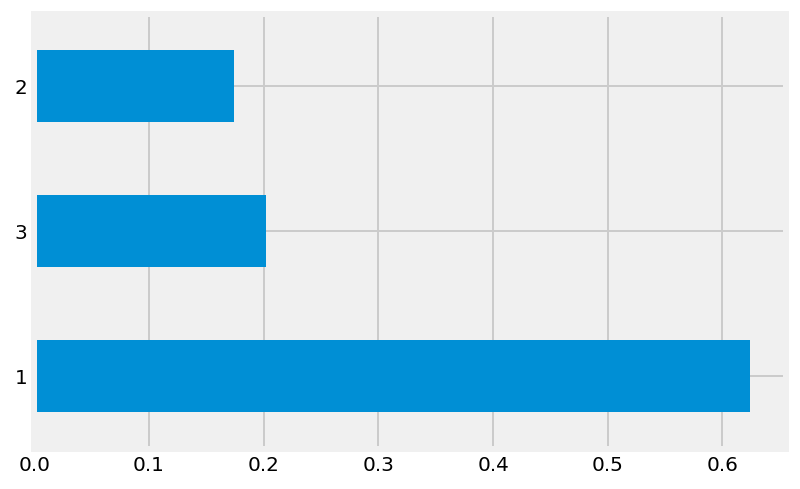

In [14]:
auto['origin'].value_counts(normalize=True).plot(kind='barh')
plt.show()

In [15]:
auto.groupby('origin')['maker'].get_group(1).unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'mercury', 'oldsmobile', 'chrysler', 'capri', 'cadillac'],
      dtype=object)

In [16]:
auto.groupby('origin')['maker'].get_group(2).unique()

array(['volkswagen', 'peugeot', 'audi', 'saab', 'bmw', 'opel', 'fiat',
       'volvo', 'renault', 'mercedes', 'triumph'], dtype=object)

In [17]:
auto.groupby('origin')['maker'].get_group(3).unique()

array(['toyota', 'datsun', 'mazda', 'honda', 'subaru', 'nissan'],
      dtype=object)

In [18]:
auto['american'] = auto.maker.map(lambda x: 1 if x in american else 0)
auto['euro'] = auto.maker.map(lambda x: 1 if x in euro else 0)
auto['asian'] = auto.maker.map(lambda x: 1 if x in asian else 0)

In [19]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,american,euro,asian
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,23.482864,5.465473,194.131714,104.242967,2973.097187,15.533760,75.994885,1.578005,0.624041,0.173913,0.202046
std,7.780610,1.703152,104.630650,38.278196,845.826366,2.758323,3.675975,0.806020,0.484990,0.379520,0.402041
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000,0.000000,0.000000
25%,17.250000,4.000000,105.000000,75.000000,2224.500000,13.750000,73.000000,1.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,151.000000,93.000000,2800.000000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,264.500000,125.000000,3611.000000,17.000000,79.000000,2.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000,1.000000


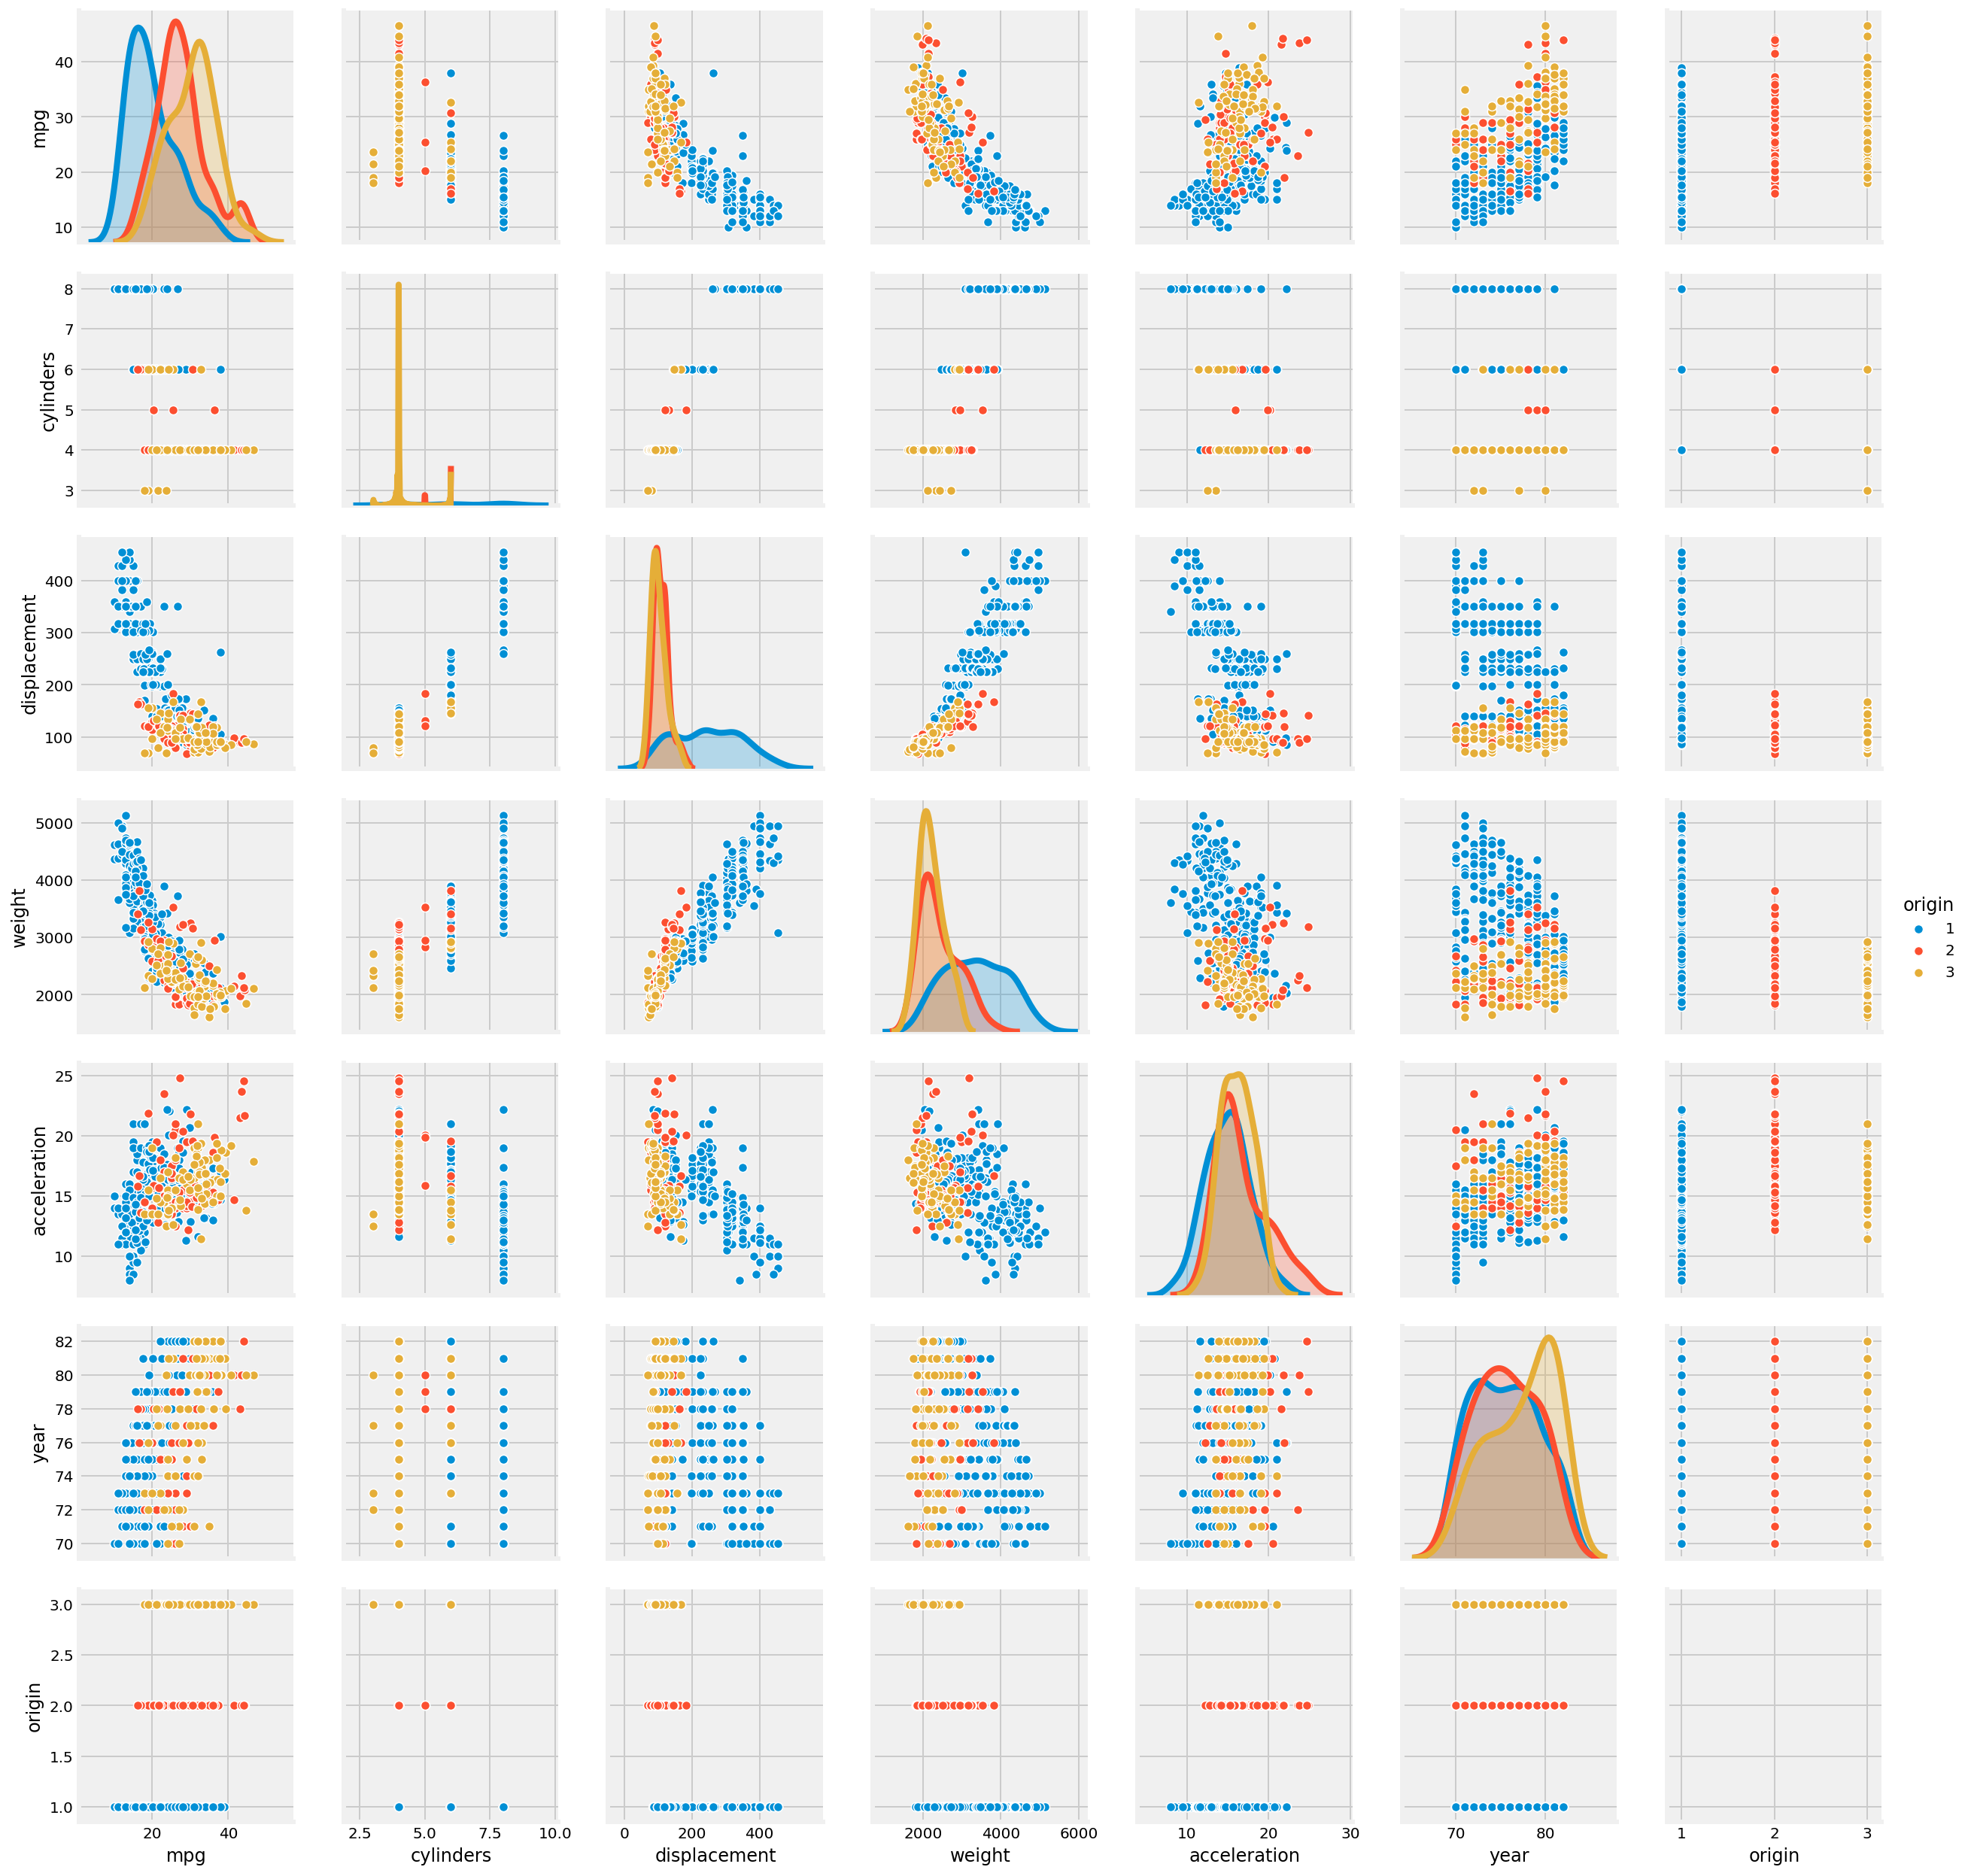

In [20]:
sns.pairplot(auto[['mpg', 'cylinders', 'displacement', 'weight',
                   'acceleration', 'year', 'origin']], hue='origin')
plt.show()

### 3. Build a model with `pymc3` to estimate the difference in MPG between American and European cars.

Make sure to inspect the results visually using `pymc3`'s built-in plotting functions.

When setting up likelihood and priors, you could choose
- a normal distribution for mpg itself 
- a normal distribution for the mean of mpg 
- a uniform distribution for the standard deviation of mpg

Check [conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior#cite_note-beta_rate-6) for other suggestions.

In [21]:
american_mpg = auto[auto.american == 1].mpg.values
european_mpg = auto[auto.euro == 1].mpg.values

print(american_mpg.mean(), european_mpg.mean())
print(american_mpg.std(), european_mpg.std())

20.078688524590163 27.602941176470587
6.401373181427647 6.53161926117945


In [22]:
import pymc3 as pm

In [23]:
prior_mean = auto.mpg.mean()
prior_std = auto.mpg.std()
print(prior_mean, prior_std)

23.48286445012788 7.78060955884693


#### Using a uniform prior for the standard deviations

In [24]:
std_prior_lower = 0.00001
std_prior_upper = 10.

with pm.Model() as model:

    usa_mean = pm.Normal('usa_mean', prior_mean, sd=50)
    euro_mean = pm.Normal('euro_mean', prior_mean, sd=50)

    usa_std = pm.Uniform('usa_std', lower=std_prior_lower,
                         upper=std_prior_upper)
    euro_std = pm.Uniform(
        'euro_std', lower=std_prior_lower, upper=std_prior_upper)

    usa_mpg = pm.Normal('usa_mpg', mu=usa_mean,
                        sd=usa_std, observed=american_mpg)
    euro_mpg = pm.Normal('euro_mpg', mu=euro_mean,
                         sd=euro_std, observed=european_mpg)

    mean_delta = pm.Deterministic('mean_delta', usa_mean - euro_mean)
    std_delta = pm.Deterministic('std_delta', usa_std - euro_std)

In [25]:
with model:

    trace = pm.sample(5000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [euro_std, usa_std, euro_mean, usa_mean]
Sampling 4 chains: 100%|██████████| 24000/24000 [00:05<00:00, 4429.94draws/s]


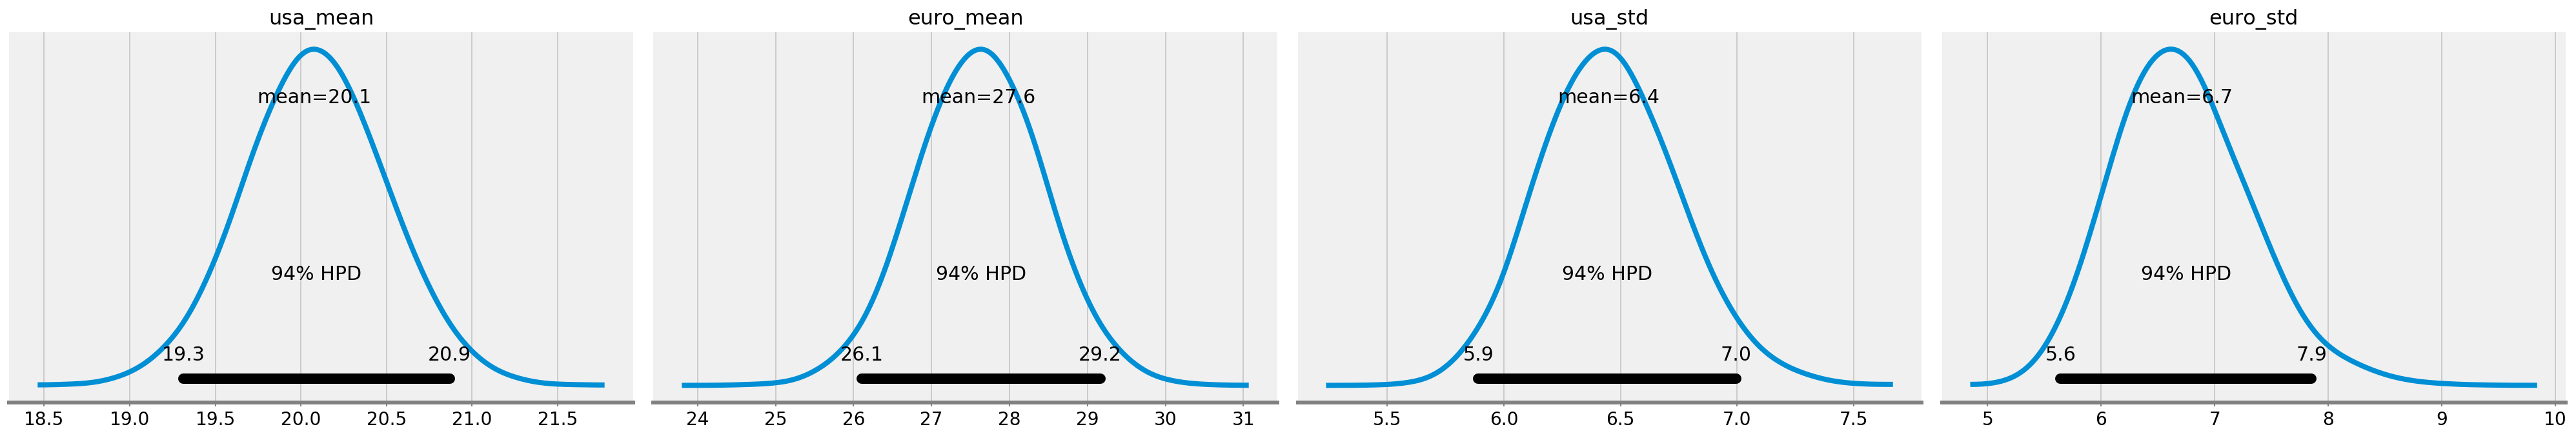

In [26]:
pm.plot_posterior(trace,
                  var_names=['usa_mean', 'euro_mean',
                            'usa_std', 'euro_std']
                  )
plt.show()

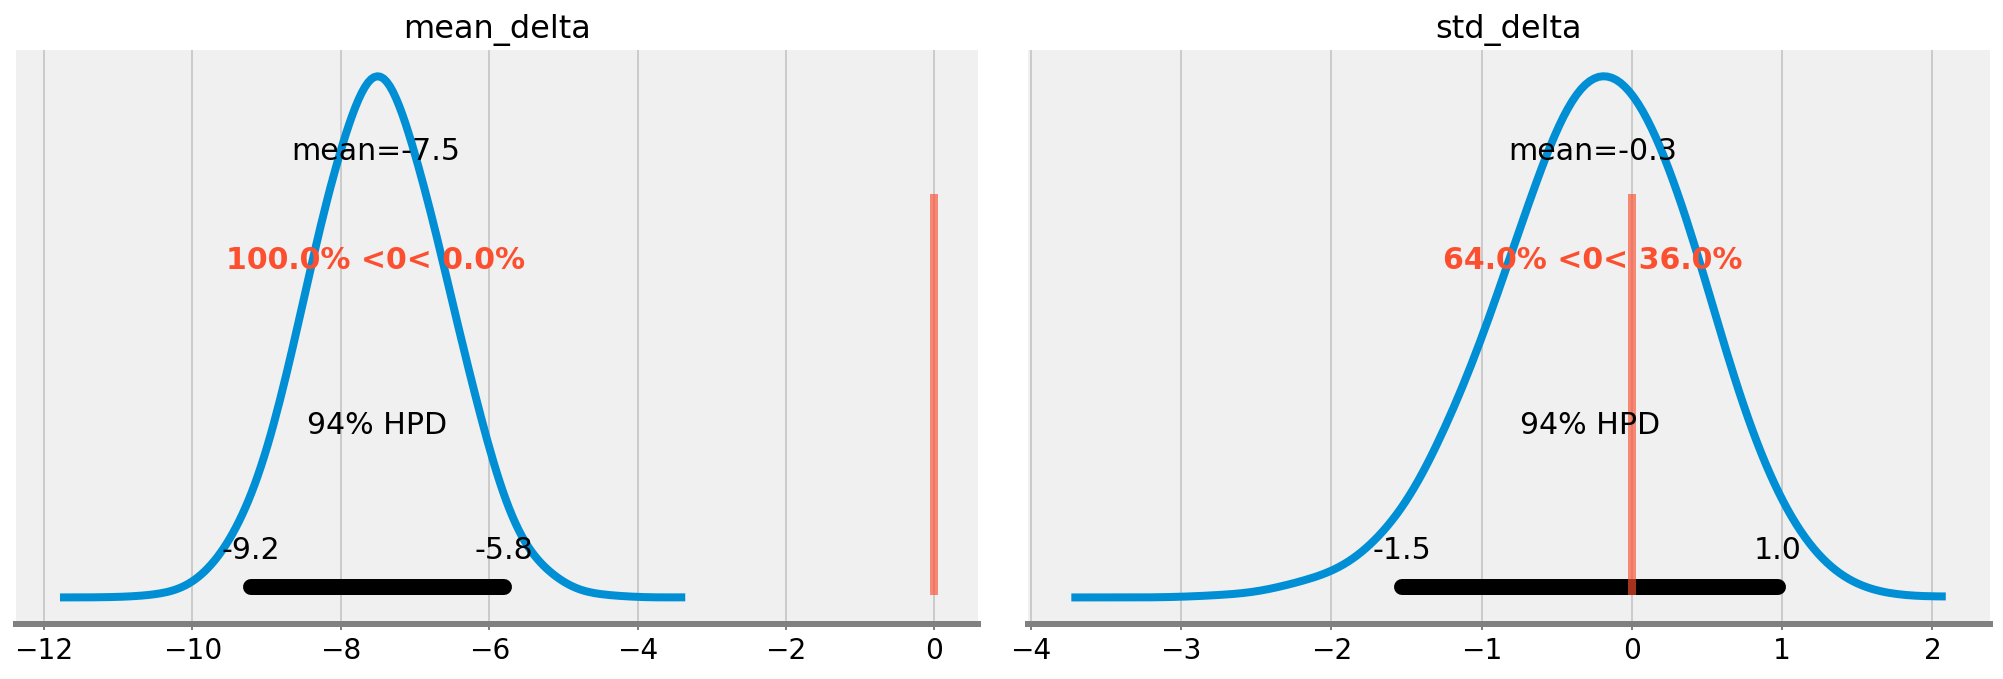

In [27]:
pm.plot_posterior(trace,
                  var_names=['mean_delta', 'std_delta'],
                  ref_val=0)
plt.show()

### 4. Build a regression predicting MPG from predictors of your choice using `pymc3`.

You can construct the model at the granular level, or if you prefer use the patsy-formula model syntax (easier). Plot out the posterior distributions of your coefficients for your model.

Set up the distributions as like in the lesson. For the regression coefficients you can choose normal distributions as a setup.

In [28]:
# discard origin, name, maker and asian (or any one of american, euro or asian)
from sklearn.preprocessing import StandardScaler
X = auto[['cylinders', 'displacement', 'horsepower',
          'weight', 'acceleration', 'year', 'american', 'euro']]


# Rescaling will allow us to use the same standard deviation for all
# the beta coefficient priors

scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)

In [29]:
with pm.Model() as reg:

    sd_start = 60.

    mpg_std = pm.Uniform('error_std', lower=0.0001, upper=sd_start)
    #mpg_std = pm.HalfCauchy('error_std',beta=10)
    # could also use pm.HalfCauchy('error_std',beta=10) here
    # could also use Flat prior for intercept
    #intercept = pm.Flat('intercept')#
    intercept = pm.Normal('intercept', mu=0., sd=sd_start)
    cyl_beta = pm.Normal('cyl_beta', mu=0., sd=sd_start)
    disp_beta = pm.Normal('disp_beta', mu=0., sd=sd_start)
    horse_beta = pm.Normal('horse_beta', mu=0., sd=sd_start)
    weight_beta = pm.Normal('weight_beta', mu=0., sd=sd_start)
    acc_beta = pm.Normal('acc_beta', mu=0., sd=sd_start)
    year_beta = pm.Normal('year_beta', mu=0., sd=sd_start)
    usa_beta = pm.Normal('usa_beta', mu=0., sd=sd_start)
    euro_beta = pm.Normal('euro_beta', mu=0., sd=sd_start)

    E_mpg = pm.Normal('y_mean',
                      mu=(intercept +
                          Xs.cylinders.values * cyl_beta +
                          Xs.displacement.values * disp_beta +
                          Xs.horsepower.values * horse_beta +
                          Xs.weight.values * weight_beta +
                          Xs.acceleration.values * acc_beta +
                          Xs.year.values * year_beta +
                          Xs.american.values * usa_beta +
                          Xs.euro.values * euro_beta  # +
                          #Xs.asian.values * asian_beta
                          ),
                      sd=mpg_std, observed=auto.mpg.values)

In [30]:
with reg:
    trace_reg = pm.sample(5000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [euro_beta, usa_beta, year_beta, acc_beta, weight_beta, horse_beta, disp_beta, cyl_beta, intercept, error_std]
Sampling 4 chains: 100%|██████████| 24000/24000 [00:31<00:00, 768.49draws/s]


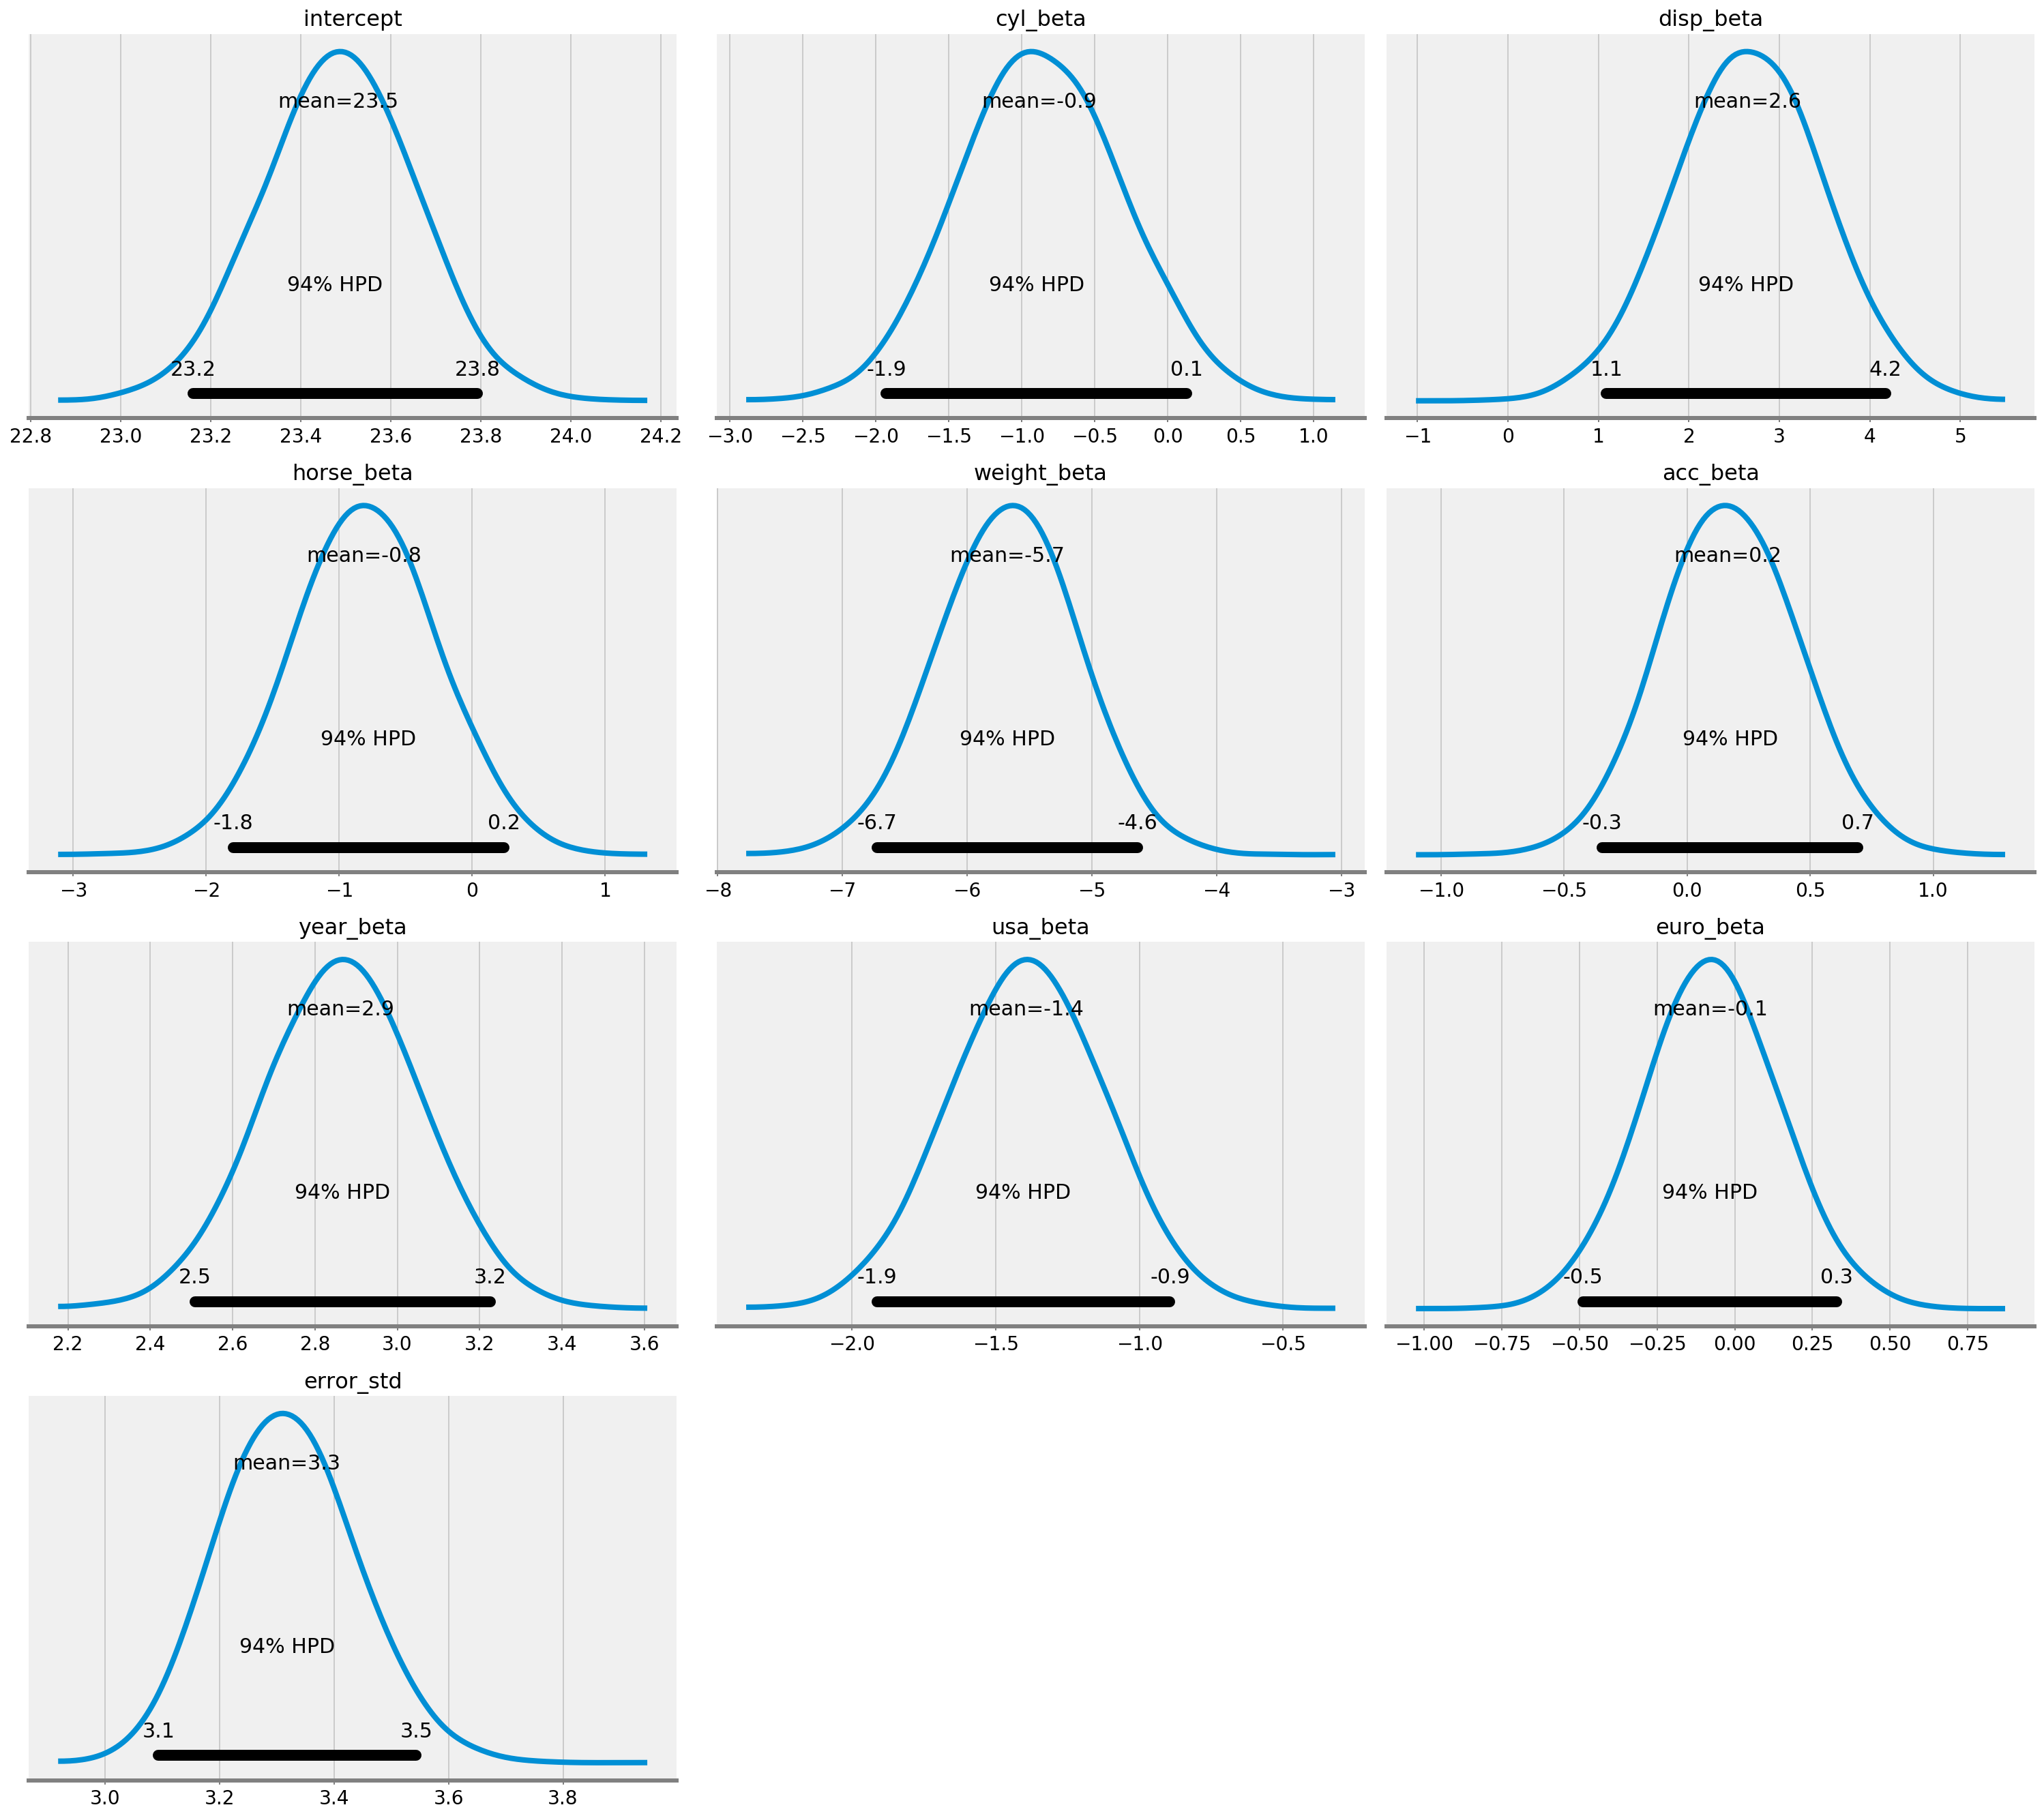

In [31]:
pm.plot_posterior(trace_reg)
plt.show()

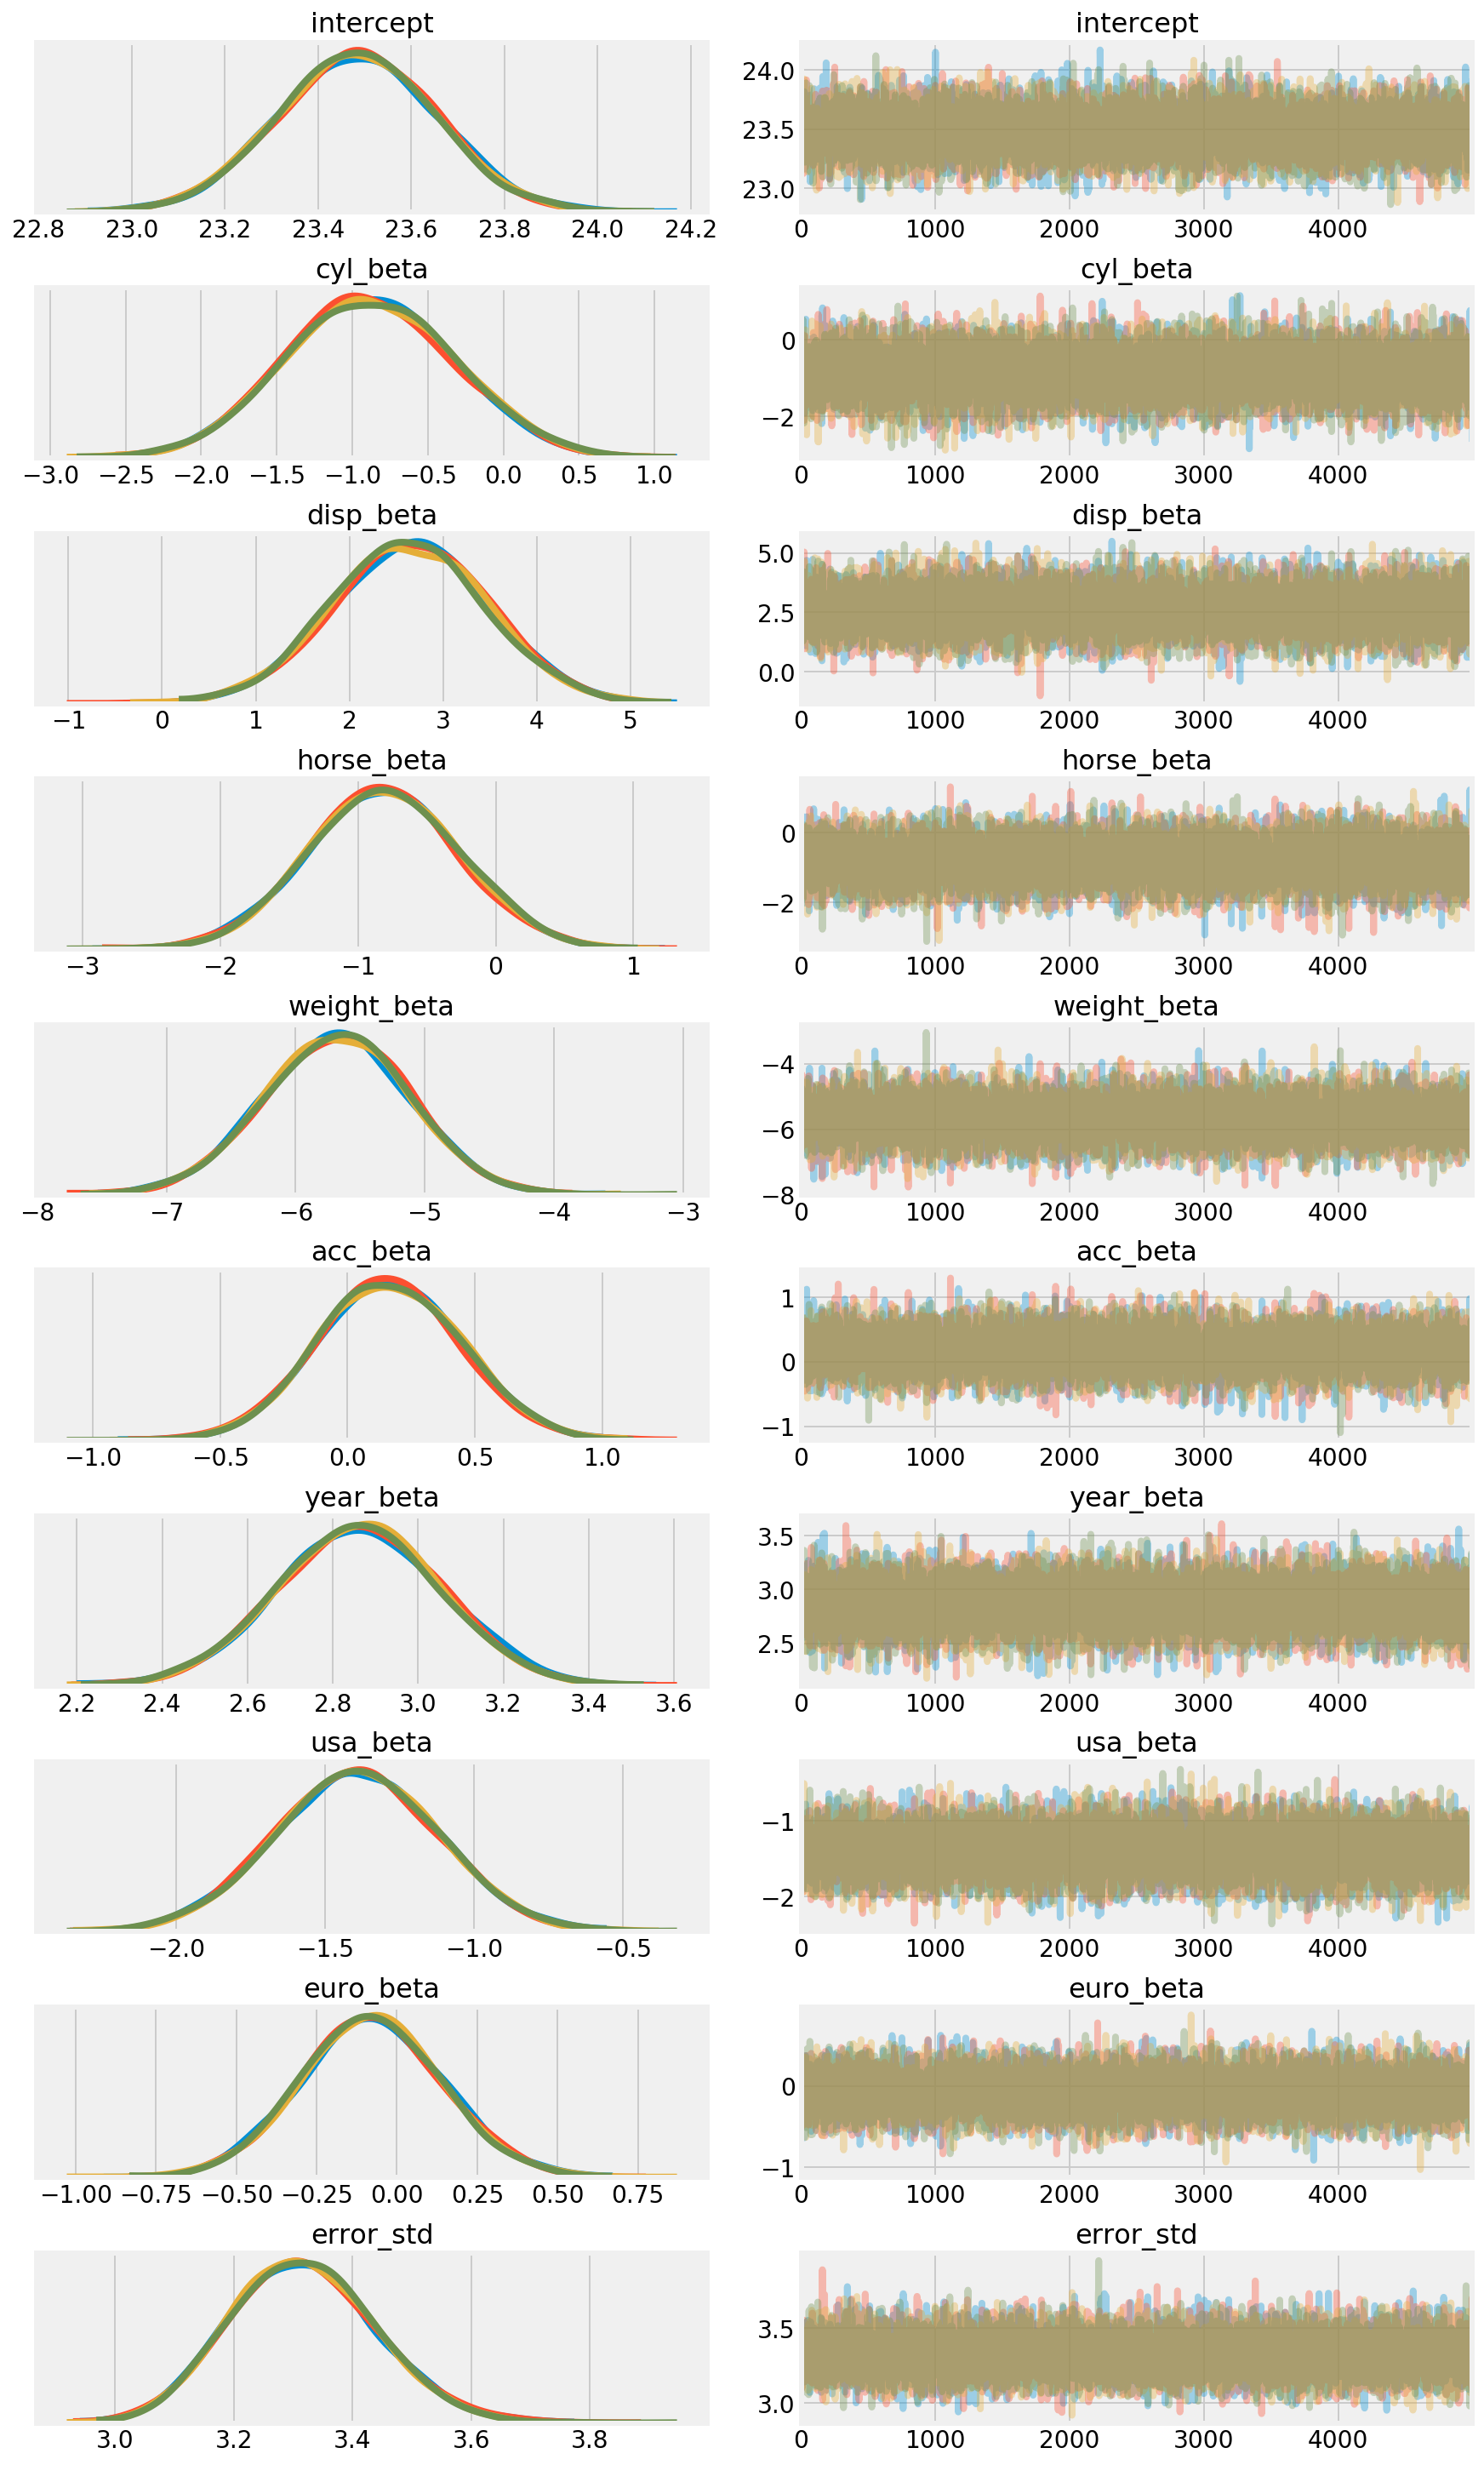

In [32]:
pm.traceplot(trace_reg)
plt.show()

In [33]:
reg_summary = pm.summary(trace_reg)
reg_summary

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,23.483274,0.168821,0.001344,23.144077,23.804760,16701.881221,0.999982
cyl_beta,-0.880915,0.552950,0.004326,-1.960054,0.183908,15525.728442,1.000001
disp_beta,2.645664,0.817649,0.007383,1.052546,4.257537,12450.087503,1.000185
horse_beta,-0.812729,0.542423,0.004294,-1.880792,0.237747,11748.995689,1.000051
weight_beta,-5.679967,0.559015,0.004987,-6.781775,-4.596368,11784.778236,0.999969
acc_beta,0.164681,0.277894,0.002313,-0.373025,0.712244,12336.863417,1.000080
year_beta,2.862581,0.191999,0.001536,2.476542,3.225650,17793.659906,1.000033
usa_beta,-1.394389,0.271173,0.002189,-1.923536,-0.861985,15524.364794,1.000000
euro_beta,-0.078702,0.216515,0.001669,-0.507503,0.347643,17122.303708,0.999964
error_std,3.317284,0.120942,0.000991,3.087190,3.555212,18507.783941,0.999996


#### Using a patsy formula instead

In [34]:
Xs['mpg'] = auto.mpg.values

In [35]:
formula = 'mpg~'+('+').join([x for x in Xs.columns if x != 'mpg'])

In [36]:
formula

'mpg~cylinders+displacement+horsepower+weight+acceleration+year+american+euro'

In [37]:
with pm.Model() as reg_glm:
    pm.glm.GLM.from_formula(formula, Xs)
    trace_glm = pm.sample(5000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, euro, american, year, acceleration, weight, horsepower, displacement, cylinders, Intercept]
Sampling 4 chains: 100%|██████████| 24000/24000 [01:05<00:00, 365.29draws/s]


In [38]:
reg_glm_summary = pm.summary(trace_glm)
reg_glm_summary

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,23.482558,0.168187,0.001177,23.148968,23.808645,19929.169019,0.999968
cylinders,-0.884564,0.550560,0.004741,-1.954023,0.174658,13837.068117,1.000130
displacement,2.649129,0.814288,0.007806,1.047383,4.219209,11426.947204,1.000180
horsepower,-0.809068,0.539537,0.005366,-1.903006,0.242621,10681.015812,1.000256
weight,-5.682714,0.555953,0.004879,-6.790262,-4.615052,11488.595392,1.000016
acceleration,0.166836,0.276118,0.002527,-0.361866,0.723780,11572.288290,1.000076
year,2.862819,0.191102,0.001476,2.487708,3.237869,17504.296634,1.000195
american,-1.391980,0.264282,0.002135,-1.896437,-0.869572,14111.355101,1.000248
euro,-0.077035,0.214459,0.001753,-0.492782,0.346930,14239.813267,1.000008
sd,3.316705,0.119676,0.001003,3.089047,3.554000,18960.108241,0.999939


In [39]:
reg_glm.model

In [40]:
preds = pm.sample_posterior_predictive(trace_glm, model=reg_glm)

print(preds['y'].shape)

100%|██████████| 20000/20000 [00:17<00:00, 1131.85it/s]

(20000, 391)


In [41]:
# averaging over all samples allows to calculate the usual R2 score
from sklearn import metrics
metrics.r2_score(auto.mpg, preds['y'].mean(axis=0))

0.8233543195005989

In [42]:
pm.r2_score(auto.mpg, preds['y'].mean(axis=0), round_to=6)

r2_r(r2_median=0.823219, r2_mean=0.823219, r2_std=0.0)

#### Compare to sklearn

In [43]:
Xs.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
american        0
euro            0
mpg             0
dtype: int64

In [44]:
from sklearn.linear_model import LinearRegression, BayesianRidge

lr = LinearRegression()

In [45]:
X = Xs.dropna()

In [46]:
cols = [x for x in Xs.columns if x != 'mpg']
y = X.mpg
X = X[cols]

In [47]:
lr.fit(X, y)
print(lr.intercept_, list(zip(cols, lr.coef_)))

23.482864450127874 [('cylinders', -0.8820215875630909), ('displacement', 2.6458878654507756), ('horsepower', -0.8074701411996968), ('weight', -5.683233597657464), ('acceleration', 0.16926401611427438), ('year', 2.8622400237435066), ('american', -1.3945171746213199), ('euro', -0.07935932248332948)]


In [48]:
lr.score(X, y)

0.823058983888965

#### Compare results from sklearn, hand-formulation and glm

In [49]:
np.around(lr.coef_ - reg_glm_summary['mean'].values[1:-1], 2)

array([ 0., -0.,  0., -0.,  0., -0., -0., -0.])

In [50]:
np.around(lr.coef_ - reg_summary['mean'].values[1:-1], 2)

array([-0.  ,  0.  ,  0.01, -0.  ,  0.  , -0.  , -0.  , -0.  ])

In [51]:
np.around(reg_summary['mean'].values[1:-1] -
          reg_glm_summary['mean'].values[1:-1], 2)

array([ 0., -0., -0.,  0., -0., -0., -0., -0.])